In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
X = np.random.rand(100,1) - 0.5 

In [22]:
X.shape

(100, 1)

In [23]:
y = X[:,0]**2 + 0.02* np.random.rand(100)

In [24]:
df = pd.DataFrame()

In [25]:
df['X'] = X.reshape(100)
df['y'] = y

In [26]:
df

,X,y
0,-0.344604,0.135048
1,-0.175582,0.040020
2,0.188823,0.043348
3,0.436746,0.208270
4,-0.356311,0.130180
...,...,...
95,-0.389444,0.166181
96,0.368143,0.145395
97,-0.393953,0.162199
98,-0.142463,0.037280


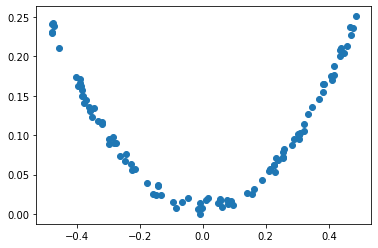

In [28]:
plt.scatter(X,y)

GRADIENT BOOST Step by Step

In [29]:
# Step-1 Prediction of first model is output of mean of y
df['pred1'] = df['y'].mean()

In [30]:
df

,X,y,pred1
0,-0.344604,0.135048,0.103859
1,-0.175582,0.040020,0.103859
2,0.188823,0.043348,0.103859
3,0.436746,0.208270,0.103859
4,-0.356311,0.130180,0.103859
...,...,...,...
95,-0.389444,0.166181,0.103859
96,0.368143,0.145395,0.103859
97,-0.393953,0.162199,0.103859
98,-0.142463,0.037280,0.103859


In [31]:
# Step-2 calculate the residual for 1st model(pseudo residual = actual output - predicted till now by all models combined)
df['res1'] = df['y'] - df['pred1']

In [32]:
df

,X,y,pred1,res1
0,-0.344604,0.135048,0.103859,0.031189
1,-0.175582,0.040020,0.103859,-0.063840
2,0.188823,0.043348,0.103859,-0.060512
3,0.436746,0.208270,0.103859,0.104411
4,-0.356311,0.130180,0.103859,0.026321
...,...,...,...,...
95,-0.389444,0.166181,0.103859,0.062322
96,0.368143,0.145395,0.103859,0.041536
97,-0.393953,0.162199,0.103859,0.058340
98,-0.142463,0.037280,0.103859,-0.066580


In [33]:
# Step-3 create 2nd model using Decision tree with res1 as output column
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor(max_leaf_nodes=8)
dt1.fit(df['X'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

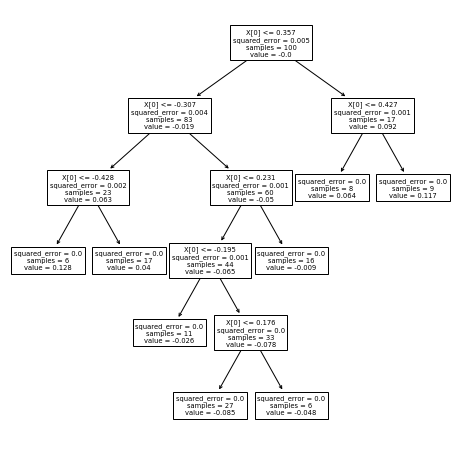

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(dt1)
plt.show()

In [40]:
# test it on random test set
X_test = np.linspace(-0.5, 0.5, 500)

In [41]:
# pred from both models combined pred1+lr*pred2 (here we use learning rate, lr as 1)
y_pred = 0.103859 + dt1.predict(X_test.reshape(500,1))

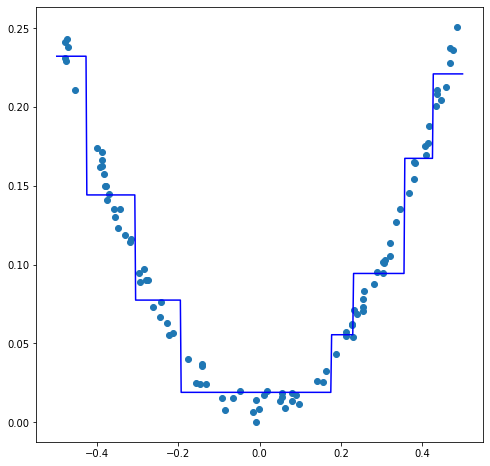

In [43]:
plt.figure(figsize=(8,8))
plt.plot(X_test, y_pred, color='blue')
plt.scatter(df['X'], df['y'])
plt.show()

In [45]:
df['pred2'] = 0.103859 + dt1.predict(df['X'].values.reshape(100,1))

In [46]:
df

,X,y,pred1,res1,pred2
0,-0.344604,0.135048,0.103859,0.031189,0.144262
1,-0.175582,0.040020,0.103859,-0.063840,0.019009
2,0.188823,0.043348,0.103859,-0.060512,0.055563
3,0.436746,0.208270,0.103859,0.104411,0.221055
4,-0.356311,0.130180,0.103859,0.026321,0.144262
...,...,...,...,...,...
95,-0.389444,0.166181,0.103859,0.062322,0.144262
96,0.368143,0.145395,0.103859,0.041536,0.167472
97,-0.393953,0.162199,0.103859,0.058340,0.144262
98,-0.142463,0.037280,0.103859,-0.066580,0.019009


In [47]:
df['res2'] = df['y'] - df['pred2']

In [48]:
df

,X,y,pred1,res1,pred2,res2
0,-0.344604,0.135048,0.103859,0.031189,0.144262,-0.009214
1,-0.175582,0.040020,0.103859,-0.063840,0.019009,0.021011
2,0.188823,0.043348,0.103859,-0.060512,0.055563,-0.012215
3,0.436746,0.208270,0.103859,0.104411,0.221055,-0.012785
4,-0.356311,0.130180,0.103859,0.026321,0.144262,-0.014082
...,...,...,...,...,...,...
95,-0.389444,0.166181,0.103859,0.062322,0.144262,0.021919
96,0.368143,0.145395,0.103859,0.041536,0.167472,-0.022077
97,-0.393953,0.162199,0.103859,0.058340,0.144262,0.017937
98,-0.142463,0.037280,0.103859,-0.066580,0.019009,0.018271


In [49]:
# Step-4 create new decision tree model with res2 as output
dt2 = DecisionTreeRegressor(max_leaf_nodes=8)
dt2.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

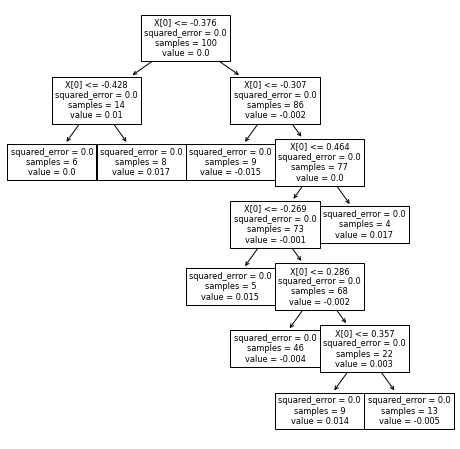

In [50]:
plt.figure(figsize=(8,8))
plot_tree(dt2)
plt.show()

In [53]:
y_pred = 0.103859 + sum(dt.predict(X_test.reshape(-1,1)) for dt in [dt1, dt2])

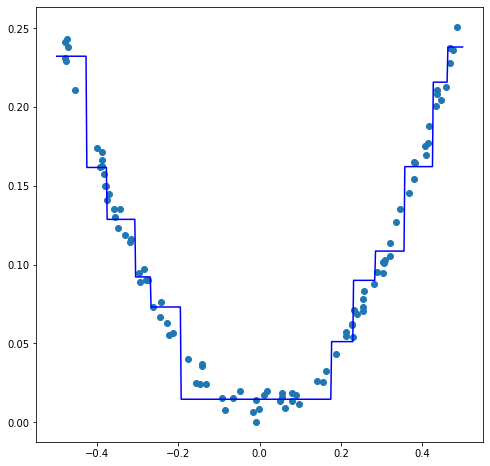

In [54]:
plt.figure(figsize=(8,8))
plt.plot(X_test, y_pred, color='blue')
plt.scatter(df['X'], df['y'])
plt.show()